## Part One

In this part of the final project, you will generate a data set that has certain statistical properties. “Synthetic” or “Fake” data can be useful for developing and testing algorithms and models.<br/>

Your solution to this part will consist of:<br>
- a jupyter notebook called fake_data_builder that:<br>
    a. carries out the construction of the desired dataset<br>
    b. answers the questions and provides the plots requested below<br>
- a copy of the fake_data.csv file that you construct.<br>

I should be able to work through your ipynb file and build the desired dataset.
This jupyter notebook and associated fake_data.csv file should be included in your Git repository.<br>

Your dataset has the following properties:<br>
- There are 800 samples.<br>
- Each sample from the dataset has five features called ID, Group, Feature_1, Feature_2 and Feature_3.<br> 
- The ID feature is a unique identifier for each sample. The identifier has the form IDxxx where x is a three digit number.<br>
- The Group feature is either A, B, or C. Roughly a third of each sample lies in each group.<br>
- Feature_1 is sampled randomly from a normal distribution with mean 2500. About 66% of the data falls between 2200 and 2800.<br>
- Feature_2 is sampled randomly from a normal distribution with mean 400 and standard deviation 15.<br>
- Feature_3 depends on the Group feature. For A, Feature_3 is approximately 3(Feature_1)-5(Feature_2). For B, Feature_3 is approximately 2(Feature_1). For C, Feature_3 is approximately -(Feature_1)+(Feature_2). In each of cases A, B, and C the difference between Feature_3 and the value given by the formula is a normally distributed random variable with mean 0 and standard deviation 12.<br>


Hint: You build a pandas dataframe from lists or vectors from a dictionary: df = pd.DataFrame({'column_name_one': data 1, 'column_name_two: data 2...}). You build a tibble from named lists df = tibble(column_name_one = data 1, ...)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

### 1. Create a dataframe or tibble representing this dataset that has the desired properties.

#### Feature 1
Based on the bell-shaped normal distribution graph,
50 + 66/2 = 83 <br>
The quantile of N(0,1) under the probability of 83%

In [2]:
# set a seed num for reproducibility
np.random.seed(12345)

# function to generate fake data as required
def generate_fake_data(n=800, mean_1 = 2500, mean_2 = 400, std_2 = 15):
    # ID feature
    ids = []
    for i in range(1, n + 1):
        ids.append('ID{:03d}'.format(i))
    ids = ['ID{:03d}'.format(i) for i in range(1, n + 1)]

    # Group feature
    # np.random.choice(a(array-like), size of int, replace = True)
    groups = np.random.choice(['A', 'B', 'C'], size=n, p=[1/3, 1/3, 1/3])

    # Feature_1
    p = 0.83
    # find the value(q) corresponding to the desired percentile,
    # then using q to determine the standard deviation
    q = norm.ppf(p)
    std_1 = (2800 - (2200 + 2800) / 2) / q
    # std_1 = 300
    feature_1 = np.random.normal(mean_1, std_1, n)
    
    # Feature_2
    feature_2 = np.random.normal(mean_2, std_2, n)

    # Feature_3 based on Group feature
    def calculate_feature_3(row):
        if row['Group'] == 'A':
            return 3 * row['Feature_1'] - 5 * row['Feature_2']
        elif row['Group'] == 'B':
            return 2 * row['Feature_1']
        else:
            return -row['Feature_1'] + row['Feature_2']
    
    # DataFrame
    df = pd.DataFrame({'ID': ids, 'Group': groups, 'Feature_1': feature_1, 'Feature_2': feature_2})
    
    # Feature_3
    df['Feature_3'] = df.apply(calculate_feature_3, axis=1)

    return df

# Create a dataframe or tibble representing this dataset that has the desired properties.
fake_data = generate_fake_data()
fake_data.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID001,C,2894.009802,424.948910,-2469.060892
1,ID002,A,2031.234528,385.056914,4168.419016
2,ID003,A,2491.280151,422.826397,5359.708465
3,ID004,A,2932.389240,403.662626,6778.854590
4,ID005,B,2492.074275,406.349961,4984.148551


In [3]:
# check # of data in each group
fake_data['Group'].value_counts()

C    271
B    267
A    262
Name: Group, dtype: int64

In [4]:
# check if about 66% of the data falls between 2200 and 2800
data_66 = len(fake_data[(fake_data.Feature_1 > 2200) & (fake_data.Feature_1 < 2800)])
data_66/len(fake_data)

0.68375

### 2. 

#### a. Based on the theoretical distribution of Feature_1, how many samples do you expect to find where the value of the feature is greater than 3000?

In [5]:
p = 0.83
# find the value(q) corresponding to the desired percentile,
# then using q to determine the standard deviation
q = norm.ppf(p)
std_1 = (2800 - (2200 + 2800) / 2) / q
print(f'std_1 for feature 1 is {round(std_1, 3)}.')

expected_3000 = (1 - norm.cdf(3000, 2500, std_1))*800
print(round(expected_3000))

std_1 for feature 1 is 314.411.
45


#### b. How many samples did you actually find where Feature_1 is greater than 3000?

In [6]:
# actual_3000 = len(fake_data[fake_data['Feature_1'] > 3000])
actual_3000 = sum([i > 3000 for i in fake_data['Feature_1']])
print(round(actual_3000))

46


#### c. Group the dataset by the Group field and compute the mean and standard deviation of Feature_3 within each group.

In [7]:
grouped_data = fake_data.groupby('Group').agg({'Feature_3': ['mean', 'std']}).reset_index()
grouped_data

Group    Feature_3            
                mean         std
0     A  5497.747500  953.722464
1     B  5021.832917  610.860061
2     C -2074.457267  297.403711

In [8]:
print("a. Expected Samples where Feature_1 > 3000:", round(expected_3000))
print("\nb. Actual Samples where Feature_1 > 3000:", round(actual_3000))
print("\nc. Grouped data:", grouped_data)

a. Expected Samples where Feature_1 > 3000: 45

b. Actual Samples where Feature_1 > 3000: 46

c. Grouped data:   Group    Feature_3            
                mean         std
0     A  5497.747500  953.722464
1     B  5021.832917  610.860061
2     C -2074.457267  297.403711


### 3. Make a scatterplot of Feature_3 vs Feature_1

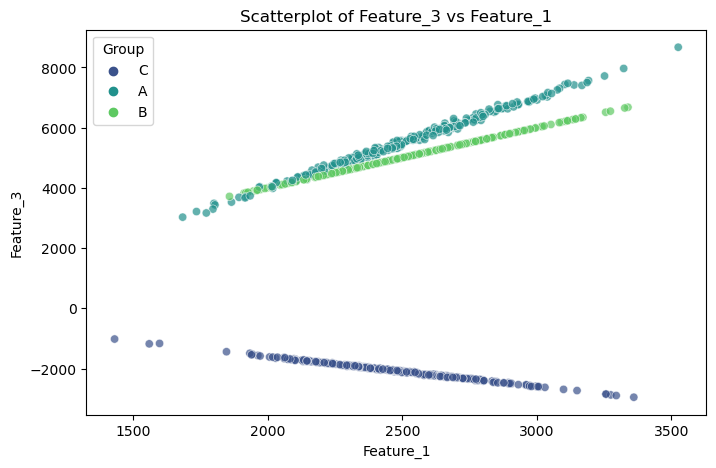

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Feature_1', y='Feature_3', data=fake_data, hue='Group', palette='viridis', alpha=0.7)
plt.title('Scatterplot of Feature_3 vs Feature_1')
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.legend(title='Group', loc='upper left')

plt.show()

### 4. Write your constructed dataframe/tibble to a csv file called fake_data.csv.

In [10]:
fake_data.to_csv('fake_data.csv', index=False)